In [37]:
# sim.reset_meep()

import meep as mp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Video
%matplotlib inline

# Define the size of the computational cell in 2D (no z dimension)
cell_size = mp.Vector3(10, 10, 0)  # x, y in microns (z=0 for 2D)
resolution = 20  # Pixels per micron

# Define the boundary layers (absorbing layers to avoid reflections)
pml_layers = [mp.PML(1.0)]  # 1-micron-thick PML boundary

# Set up a continuous plane wave source at a certain frequency
# Define parameters for the pulse
wavelength = 1  # Wavelength in arbitrary units
frequency = 1.0 / wavelength  # Center frequency in arbitrary units
pulse_duration = 0.5  # Duration of the pulse in arbitrary time units
source_center = mp.Vector3(-3, 0, 0)  # Position of the source (start pulse at x=-4)
source_size = mp.Vector3(0, 10, 0)    # Extend pulse over the Y axis

# Create a single Gaussian source with a specified amplitude
sources = [mp.Source(
    mp.GaussianSource(frequency=frequency, fwidth=1.0/pulse_duration),  # Gaussian source
    component=mp.Ez,  # Ez component for TM mode (electric field out of the plane)
    center=source_center,
    size=source_size,
    amplitude = 1
)]
# Define the simulation object (2D mode is implicit with no z-dimension)
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources)




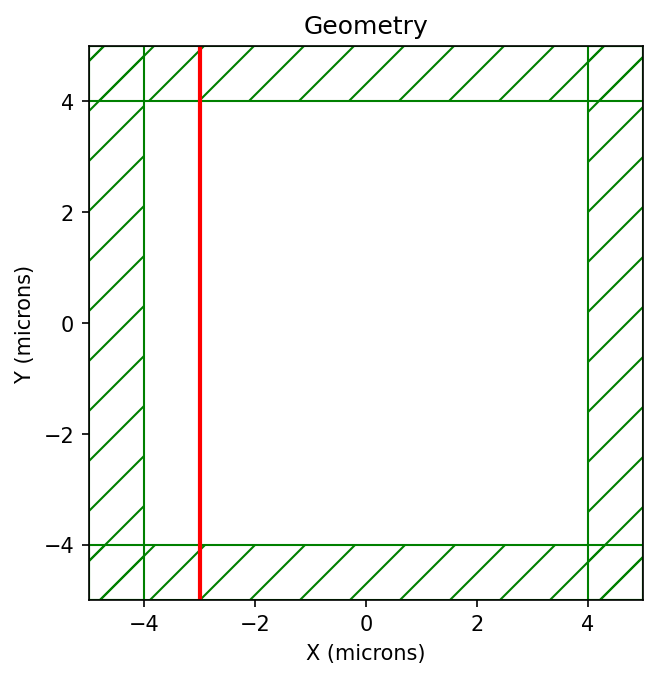

In [38]:
# Plotting
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.title("Geometry")
plt.xlabel("X (microns)")
plt.ylabel("Y (microns)")
plt.show()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000213861 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 20
time for set_epsilon = 0.0298588 s
-----------
run 0 finished at t = 10.0 (400 timesteps)


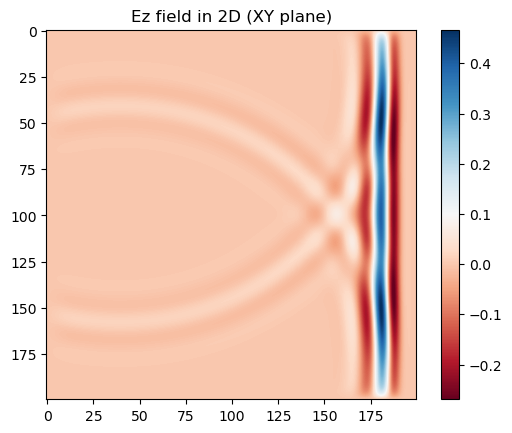

In [39]:
# Run the simulation for a given number of time steps
sim.reset_meep()

simulation_time = 10  # Simulation time in arbitrary units
sim.run(until=simulation_time)

# Output the electric field (Ez) in the XY plane
ez_slice = sim.get_array(center=mp.Vector3(0, 0), size=mp.Vector3(10, 10), component=mp.Ez)

# Plot the field slice
plt.figure(dpi=100)
plt.imshow(np.flipud(ez_slice.T), interpolation='spline36', cmap='RdBu')
plt.colorbar()
# plt.xlim([15, 25])
plt.title("Ez field in 2D (XY plane)")
plt.show()



In [40]:
# Run the simulation and output the field data
sim.reset_meep()

sim.run(mp.at_beginning(mp.output_epsilon),
        mp.to_appended("ez", mp.at_every(0.001, mp.output_efield_z)),
        until=0.1)  # Specify your desired end time here

# Create the animation of the electric field evolution
f = plt.figure(dpi=150)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)

# Capture frames for the animation
sim.run(mp.at_every(0.01, Animate), until=20)  # Specify your desired end time here

plt.close()

# Check number of frames saved
print(f"Number of frames saved: {len(Animate._saved_frames)}")


-----------
Initializing structure...
time for choose_chunkdivision = 0.000213861 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 20
time for set_epsilon = 0.0281348 s
-----------
creating output file "./eps-000000.00.h5"...
creating output file "./ez.h5"...
run 1 finished at t = 0.1 (4 timesteps)
Normalizing field data...
run 2 finished at t = 20.1 (804 timesteps)
Number of frames saved: 801


In [41]:
# Save the animation to a video file
filename = "electric_field_noslab_evolution_Gauss.mp4"
Animate.to_mp4(60, filename)  # 10 fps
Video(filename)

Generating MP4...


In [42]:
import meep as mp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Video
%matplotlib inline

# Define the size of the computational cell in 2D (no z dimension)
cell_size = mp.Vector3(10, 10, 0)  # x, y in microns (z=0 for 2D)
resolution = 20  # Pixels per micron

# Define the boundary layers (absorbing layers to avoid reflections)
pml_layers = [mp.PML(1.0)]  # 1-micron-thick PML boundary

# Define parameters for the pulse
wavelength = 1  # Wavelength in arbitrary units
frequency = 1.0 / wavelength  # Center frequency in arbitrary units
pulse_duration = 0.5  # Duration of the pulse in arbitrary time units
source_center = mp.Vector3(-3, 0, 0)  # Position of the source (start pulse at x=-4)
source_size = mp.Vector3(0, 10, 0)    # Extend pulse over the Y axis

# Create a single Gaussian source with a specified amplitude
sources = [mp.Source(
    mp.GaussianSource(frequency=frequency, fwidth=1.0/pulse_duration),  # Gaussian source
    component=mp.Ez,  # Ez component for TM mode (electric field out of the plane)
    center=source_center,
    size=source_size,
    amplitude = 1
)]

# Define the dielectric slab
geom_center = mp.Vector3(1, 0, 0)
geometry = [mp.Block(mp.Vector3(2, mp.inf, mp.inf),  # Width, height, depth of the block
                     center=geom_center,
                     material=mp.Medium(epsilon=2.5**2))]

# Define the simulation object (2D mode is implicit with no z-dimension)
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=sources)





     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)


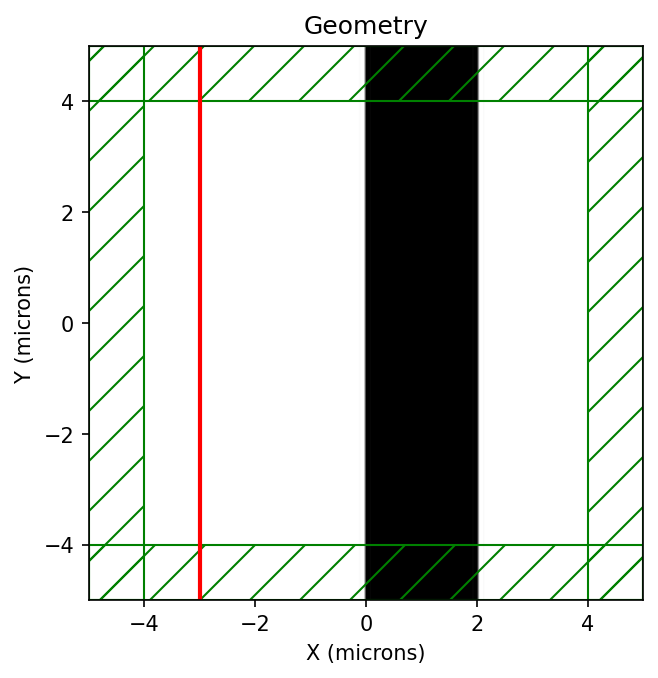

In [43]:
# Plotting
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.title("Geometry")
plt.xlabel("X (microns)")
plt.ylabel("Y (microns)")
plt.show()


-----------
Initializing structure...
time for choose_chunkdivision = 0.000135183 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 20
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
time for set_epsilon = 0.037864 s
-----------
run 0 finished at t = 10.0 (400 timesteps)


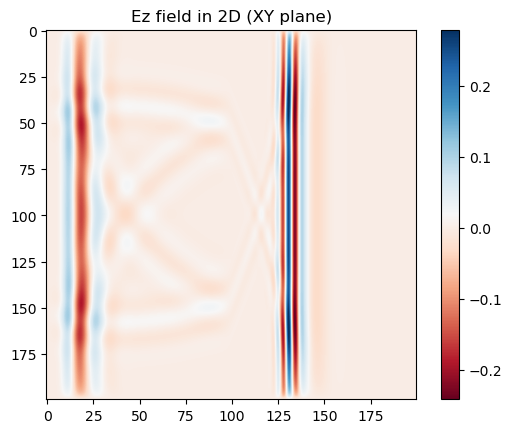

In [44]:
sim.reset_meep()

# Run the simulation for a few time steps to allow the field to propagate
sim.run(until=10)

# Output the electric field (Ez) in the XY plane
ez_slice = sim.get_array(center=mp.Vector3(0, 0), size=mp.Vector3(10, 10), component=mp.Ez)

# Plot the field slice
plt.figure(dpi=100)
plt.imshow(np.flipud(ez_slice.T), interpolation='spline36', cmap='RdBu')
plt.colorbar()
plt.title("Ez field in 2D (XY plane)")
plt.show()


In [60]:
# Run the simulation and output the field data
sim.reset_meep()

# sim.run(mp.at_beginning(mp.output_epsilon),
#         mp.to_appended("ez", mp.at_every(1, mp.output_efield_z)),
#         until=60)  # Specify your desired end time here
# Create the animation of the electric field evolution
f = plt.figure(dpi=150)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.1, Animate), until=40)
plt.close()

# Check number of frames saved
print(f"Number of frames saved: {len(Animate._saved_frames)}")

-----------
Initializing structure...
time for choose_chunkdivision = 0.000123024 s
Working in 2D dimensions.
Computational cell is 10 x 10 x 0 with resolution 20
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
time for set_epsilon = 0.0347631 s
-----------
     block, center = (1,0,0)
          size (2,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (6.25,6.25,6.25)
Normalizing field data...
run 4 finished at t = 40.0 (1600 timesteps)
Number of frames saved: 400


In [46]:
# Save the animation to a video file
filename = "electric_field_slab_evolution_Gauss.mp4"
Animate.to_mp4(60, filename)  # 10 fps
Video(filename)

Generating MP4...
